In [1]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df=pd.read_csv('housing.csv', header=None, delimiter = r"\s+" ) #

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
df.columns=column_names
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:13]
y=df.iloc[:,13]


x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, shuffle=True)

In [5]:
# normalization:
mean=x_train.mean(axis=0)
x_train -= mean
std=x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

# Approach 1: Neural Network

In [28]:
# network architecture
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1)) 
        
model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae']) # mae: mean absolute error

model_history=model.fit(x_train, y_train, validation_data=[x_test,y_test], epochs=40, batch_size=10, verbose=False)

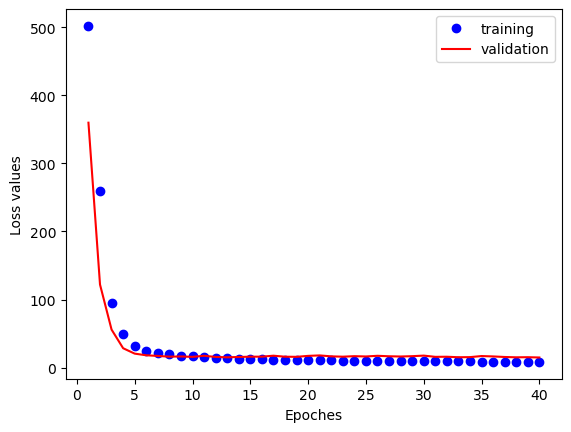

In [29]:
#overfit checking

history_dict=model_history.history

loss_values_train=history_dict['loss'] # marbot be loss e train
loss_values_val=history_dict['val_loss'] # marbot be loss e validation

epoches=range(1, len(loss_values_train)+1)

plt.plot(epoches,loss_values_train, 'bo',label='training')
plt.plot(epoches,loss_values_val,'r', label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss values')
plt.legend()
plt.show()

In [30]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

4/4 [==============================] - 0s 7ms/step


In [31]:

def plot_results1(y_train, y_train_pred, y_test, y_test_pred):
    
    f = plt.figure(figsize=(8,4), constrained_layout=True)

    ax1 = f.add_subplot(2,2,1, title='Prediction Train')
    ax2 = f.add_subplot(2,2,2, title='Prediction Test')


    xeplot=np.arange(len(y_train)) 
    ax1.plot(xeplot, y_train,'blue')
    ax1.plot(xeplot, y_train_pred, 'red')


    xeplot=np.arange(len(y_test)) 
    ax2.plot(xeplot, y_test,'blue')
    ax2.plot(xeplot, y_test_pred, 'red')


    ax3 = f.add_subplot(2,2,3, title='Actual Prices vs Predicted Prices Train')
    ax4 = f.add_subplot(2,2,4, title='Actual Prices vs Predicted Prices Test')

    ax3.scatter(y_train, y_train_pred)
    ax4.scatter(y_test, y_test_pred)


    plt.show()

In [32]:
from importlib import reload
reload(plt)

def plot_results2(y_train, y_train_pred, y_test, y_test_pred):  
    
    plt.figure(figsize=(8,4), constrained_layout=True)

    plt.subplot(2,2,1)
    xeplot=np.arange(len(y_train)) 
    plt.plot(xeplot, y_train,'blue')
    plt.plot(xeplot, y_train_pred, 'red')
    plt.title('Prediction Train')

    plt.subplot(2,2,2)
    xeplot=np.arange(len(y_test)) 
    plt.plot(xeplot, y_test,'blue')
    plt.plot(xeplot, y_test_pred, 'red')
    plt.title('Prediction Test')


    plt.subplot(2,2,3)
    plt.scatter(y_train, y_train_pred)
    plt.title('Scatter Train')

    plt.subplot(2,2,4)
    plt.scatter(y_test, y_test_pred)
    plt.title('Scatter Test')


    plt.show()

In [33]:
def regplot_results(y_train, y_train_pred, y_test, y_test_pred):  
    
    plt.figure(figsize = (10,3))


    plt.subplot(1,2,1)
    sns.regplot(x=y_train,y=y_train_pred)
    plt.title('Reg Plot Train', fontsize = 10)

    plt.subplot(1,2,2)
    sns.regplot(x=y_test,y=y_test_pred)
    plt.title('Reg Plot Test', fontsize = 10)

    plt.show()

In [34]:
# Evaluation:

from sklearn import metrics

def evaluation(y_train, y_train_pred, y_test, y_test_pred):  
    
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)

    mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    mae_test = metrics.mean_absolute_error(y_test, y_test_pred)

    print('MSE of train: ', mse_train)
    print('MSE of test: ', mse_test)
    print('\n')
    print('MAE of train: ', mae_train)
    print('MAE of test: ', mae_test)
    
    return mse_train, mse_test, mae_train, mae_test

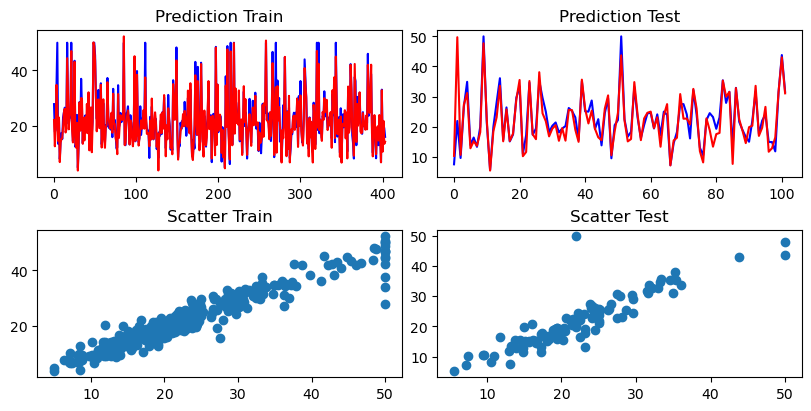

In [35]:
plot_results2(y_train, y_train_pred, y_test, y_test_pred)

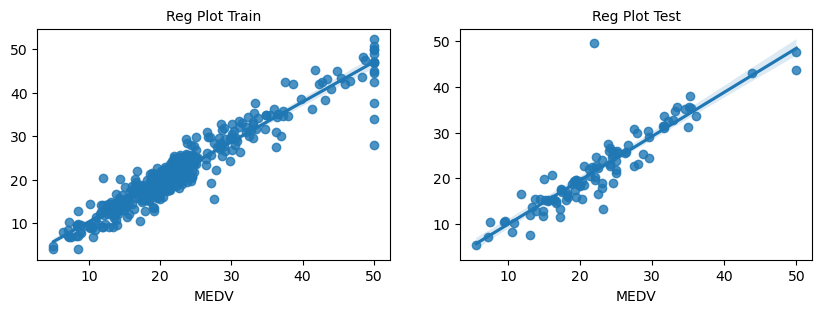

In [36]:
regplot_results(y_train, y_train_pred, y_test, y_test_pred)

In [37]:
mse_train1, mse_test1, mae_train1, mae_test1=evaluation(y_train, y_train_pred, y_test, y_test_pred)

MSE of train:  8.39888832371596
MSE of test:  14.797859897136073


MAE of train:  1.9849145703976696
MAE of test:  2.2372693407769293


# Approach2: XGBRegressor

In [38]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

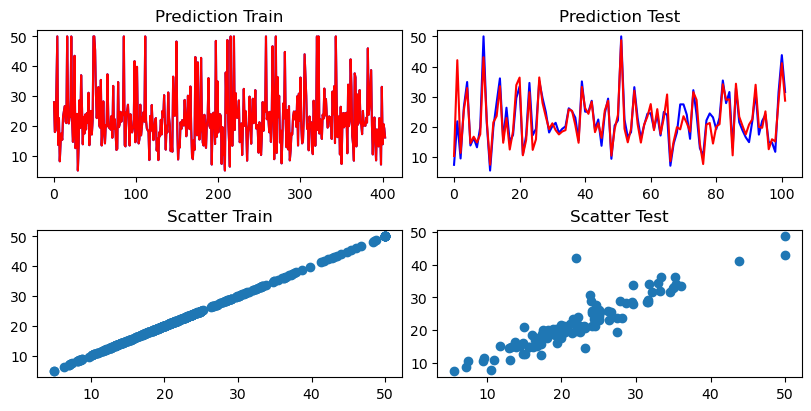

In [39]:
plot_results2(y_train, y_train_pred, y_test, y_test_pred)

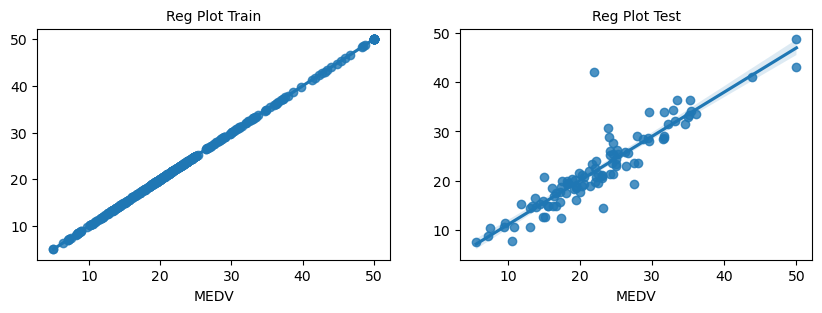

In [40]:
regplot_results(y_train, y_train_pred, y_test, y_test_pred)

In [41]:
mse_train2, mse_test2, mae_train2, mae_test2=evaluation(y_train, y_train_pred, y_test, y_test_pred)

MSE of train:  0.00026086586458929484
MSE of test:  10.691102857240008


MAE of train:  0.01097464962761008
MAE of test:  2.224239888845706


# Approach 3: LinearRegression

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

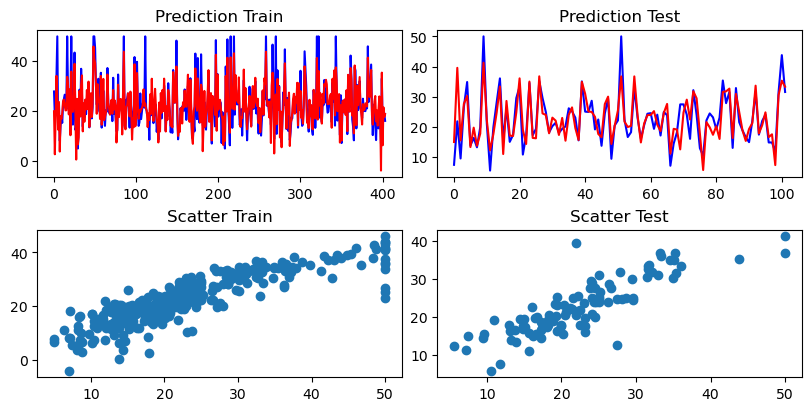

In [43]:
plot_results2(y_train, y_train_pred, y_test, y_test_pred)

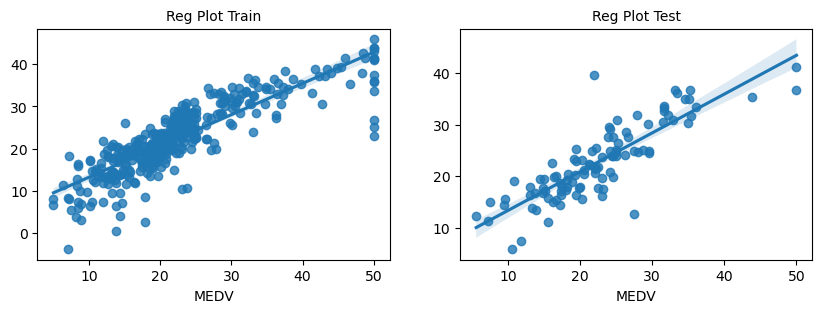

In [44]:
regplot_results(y_train, y_train_pred, y_test, y_test_pred)

In [45]:
mse_train3, mse_test3, mae_train3, mae_test3=evaluation(y_train, y_train_pred, y_test, y_test_pred)

MSE of train:  22.99773109421863
MSE of test:  19.064968047926044


MAE of train:  3.3691242628311
MAE of test:  3.181111028545053


# Approach 4: RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

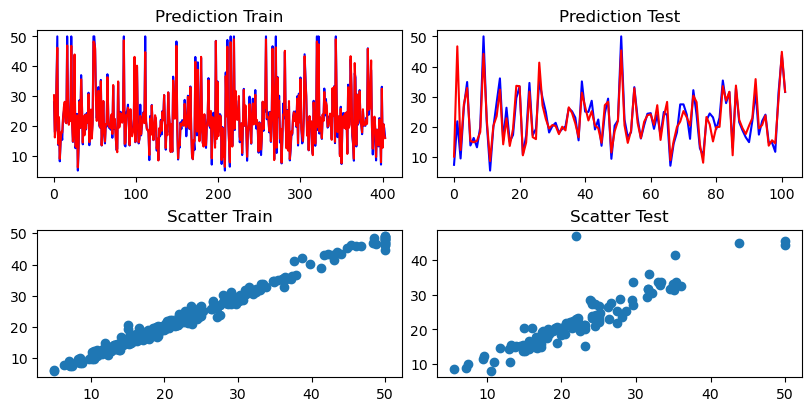

In [47]:
plot_results2(y_train, y_train_pred, y_test, y_test_pred)

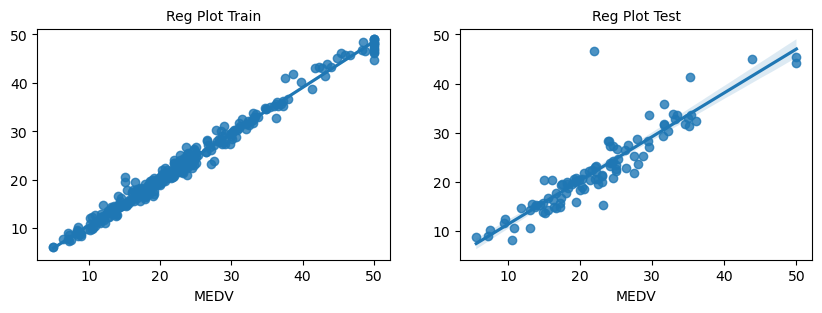

In [48]:
regplot_results(y_train, y_train_pred, y_test, y_test_pred)

In [49]:
mse_train4, mse_test4, mae_train4, mae_test4=evaluation(y_train, y_train_pred, y_test, y_test_pred)

MSE of train:  1.350003705445543
MSE of test:  12.193226156862737


MAE of train:  0.8203143564356428
MAE of test:  2.203666666666665


# Comparision of all the models

In [53]:
results={'Neural Network': [mse_train1, mse_test1, mae_train1, mae_test1], 
         'XGB Regressor':[mse_train2, mse_test2, mae_train2, mae_test2], 
         'Linear Regression':[mse_train3, mse_test3, mae_train3, mae_test3], 
         'Random Forest Regressor':[mse_train4, mse_test4, mae_train4, mae_test4]}

models_results = pd.DataFrame(results, index=['mse_train', 'mse_test', 'mae_train', 'mae_test'])


In [54]:
models_results

,Neural network,XGB Regressor,Linear Regression,Random Forest Regressor
mse_train,8.398888,0.000261,22.997731,1.350004
mse_test,14.797860,10.691103,19.064968,12.193226
mae_train,1.984915,0.010975,3.369124,0.820314
mae_test,2.237269,2.224240,3.181111,2.203667


In [ ]:
# Ranking: 1-XGB Regressor, 2-Random Forest Regressor, 3-Neural Network, 4-Linear Regression